In [277]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


with open('./letter-recognition.data') as text:
    data = text.readlines()
data = [ item.replace('\n','').split(',') for item in data]
df = pd.DataFrame(data)

In [287]:
y = df[df.columns[0]].copy()
X = df[df.columns[1:]].applymap(lambda x:int(x)).copy()
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Logistic Regression Model

In [298]:
lr = LogisticRegression(max_iter=5000,random_state=42)
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

In [299]:
Logistic_Regression_Report = classification_report(y_pred=y_pred,y_true=y_test)
print(Logistic_Regression_Report)

              precision    recall  f1-score   support

           A       0.84      0.89      0.86       149
           B       0.70      0.75      0.73       153
           C       0.79      0.73      0.76       137
           D       0.76      0.82      0.79       156
           E       0.81      0.86      0.83       141
           F       0.78      0.81      0.80       140
           G       0.66      0.61      0.63       160
           H       0.56      0.43      0.49       144
           I       0.86      0.81      0.83       146
           J       0.76      0.83      0.79       149
           K       0.64      0.67      0.65       130
           L       0.87      0.83      0.85       155
           M       0.94      0.89      0.91       168
           N       0.85      0.81      0.83       151
           O       0.67      0.71      0.69       145
           P       0.93      0.80      0.86       173
           Q       0.70      0.72      0.71       166
           R       0.67    

<Axes: >

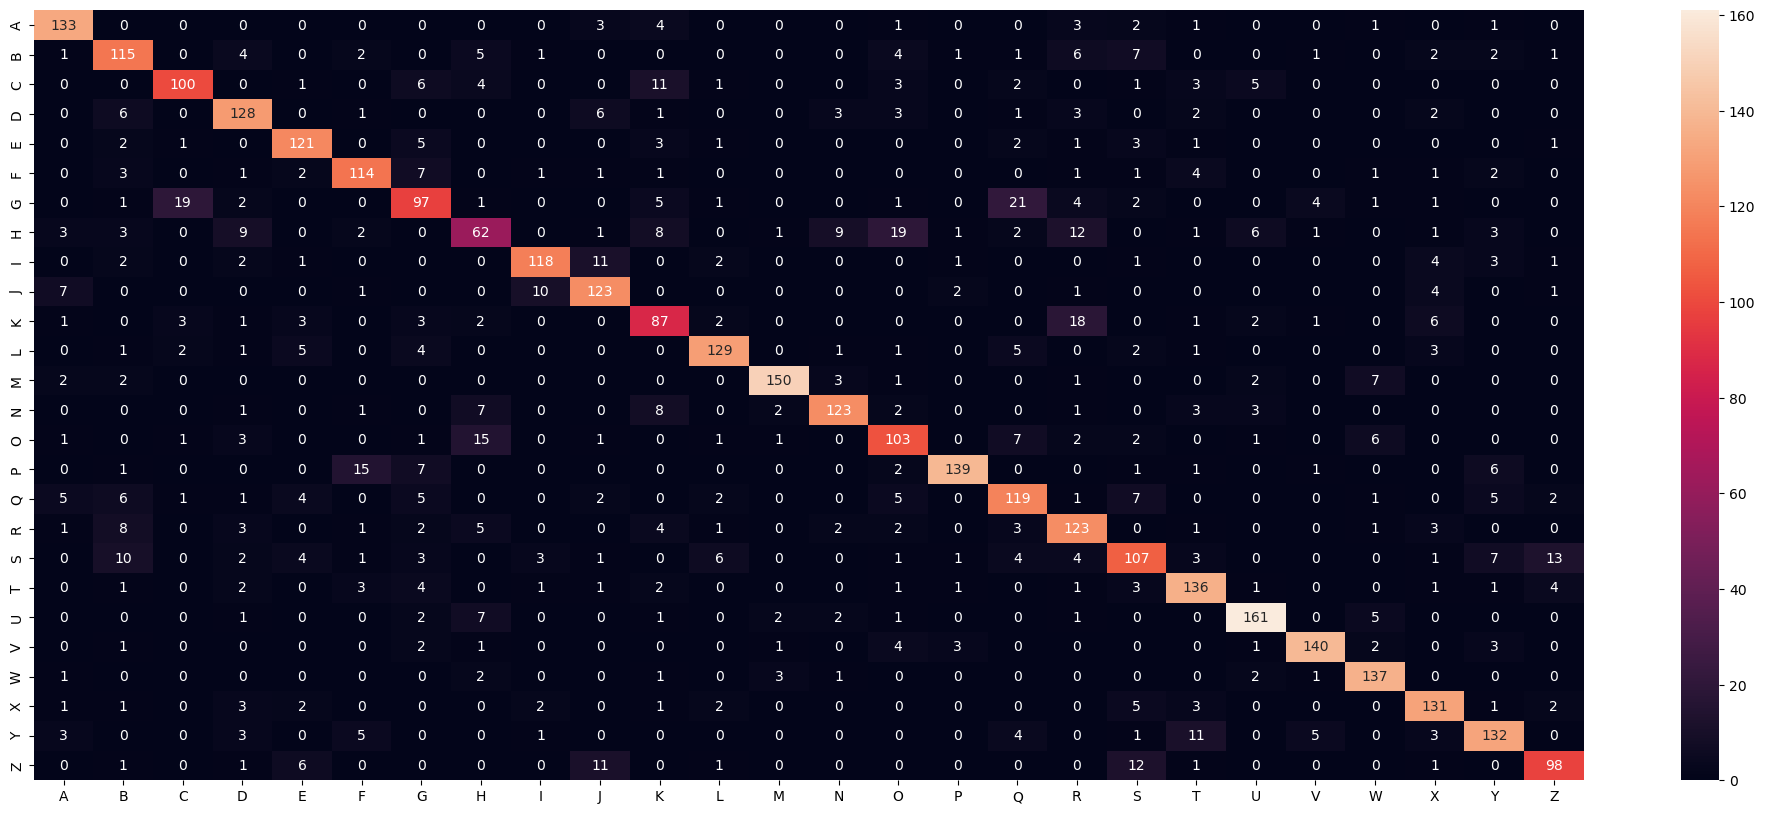

In [300]:
labels = y_test.sort_values().unique()
log_reg_confusion_matrix = confusion_matrix(y_true=y_test,y_pred=y_pred)

plt.figure(figsize=(25,10))
sns.heatmap(log_reg_confusion_matrix,annot=True,fmt=".0f",yticklabels=labels,xticklabels=labels)


## Random Forest Model

In [282]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)

Random_Forest_Report = classification_report(y_pred=y_pred_rfc,y_true=y_test)
print(Random_Forest_Report)

              precision    recall  f1-score   support

           A       0.98      1.00      0.99       149
           B       0.89      0.97      0.93       153
           C       0.99      0.92      0.95       137
           D       0.90      0.97      0.94       156
           E       0.90      0.99      0.95       141
           F       0.93      0.97      0.95       140
           G       0.98      0.96      0.97       160
           H       0.96      0.89      0.92       144
           I       0.99      0.92      0.96       146
           J       0.95      0.98      0.97       149
           K       0.94      0.91      0.93       130
           L       0.99      0.97      0.98       155
           M       0.97      0.99      0.98       168
           N       0.98      0.92      0.95       151
           O       0.95      0.95      0.95       145
           P       0.97      0.95      0.96       173
           Q       0.96      0.97      0.97       166
           R       0.91    

<Axes: >

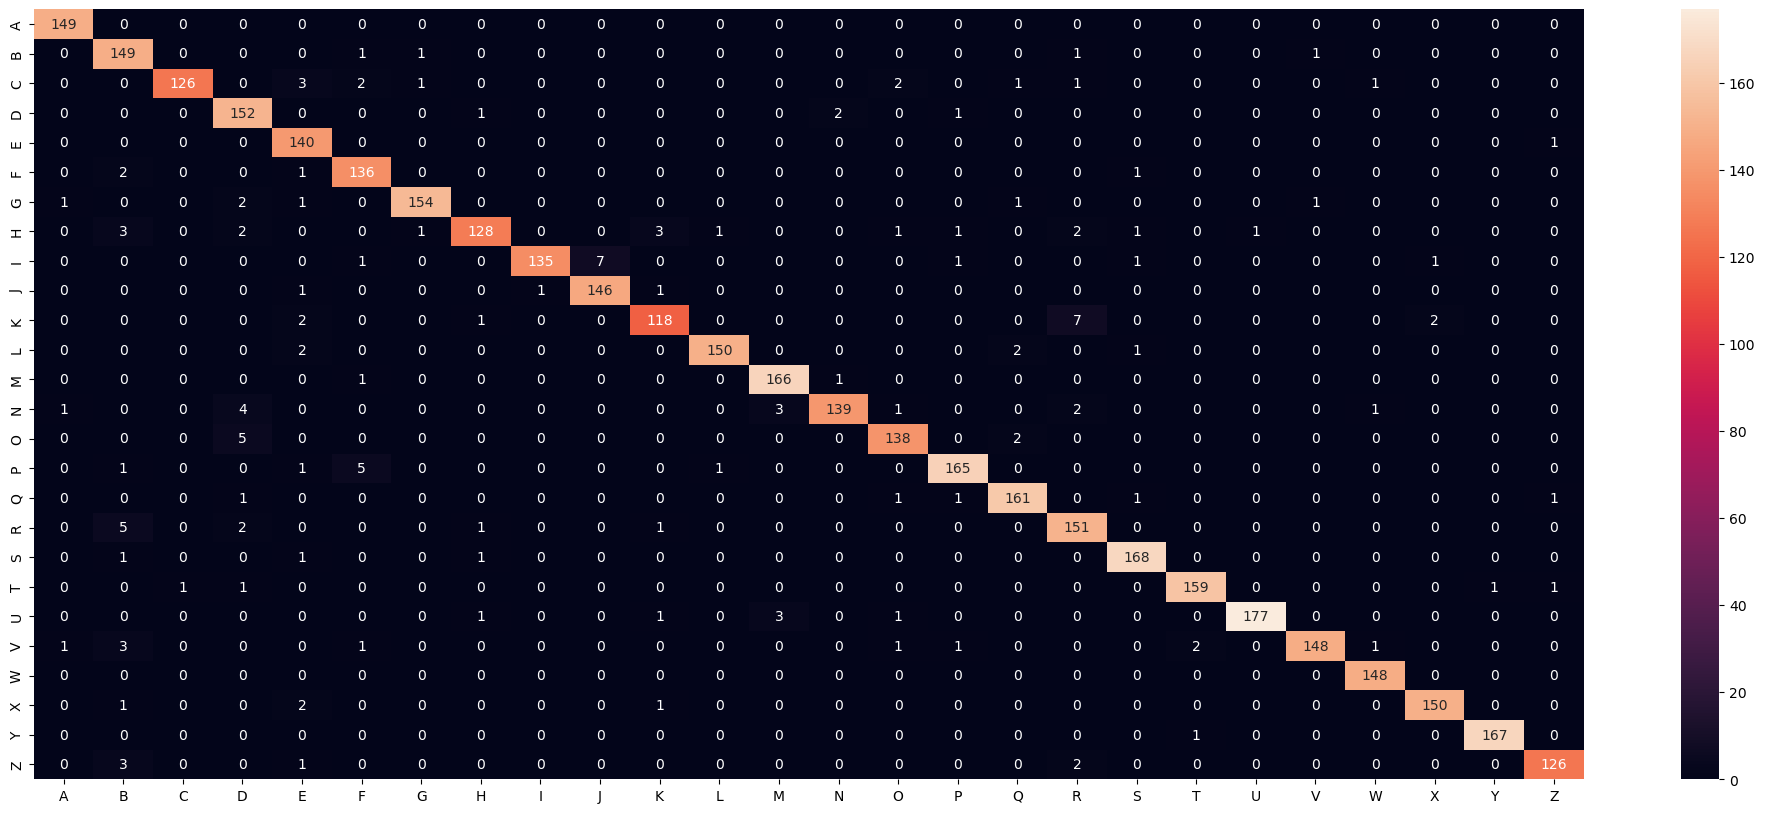

In [283]:
rcf_confusion_matrix = confusion_matrix(y_true=y_test,y_pred=y_pred_rfc)
plt.figure(figsize=(25,10))
sns.heatmap(rcf_confusion_matrix,annot=True,fmt=".0f",yticklabels=labels,xticklabels=labels)

## SVC Model

In [295]:
svc = SVC(random_state=42,kernel='poly')
svc.fit(x_train,y_train)

SVC(kernel='poly', random_state=42)

In [296]:
y_pred_svc = svc.predict(x_test)
SVC_Report = classification_report(y_pred=y_pred_svc,y_true=y_test)
print(SVC_Report)

              precision    recall  f1-score   support

           A       0.97      0.99      0.98       149
           B       0.87      0.95      0.91       153
           C       0.94      0.92      0.93       137
           D       0.90      0.95      0.92       156
           E       0.94      0.96      0.95       141
           F       0.89      0.96      0.93       140
           G       0.91      0.97      0.94       160
           H       0.96      0.85      0.90       144
           I       0.96      0.95      0.95       146
           J       0.97      0.95      0.96       149
           K       0.92      0.93      0.92       130
           L       0.99      0.95      0.97       155
           M       0.98      0.98      0.98       168
           N       0.97      0.93      0.95       151
           O       0.93      0.94      0.93       145
           P       0.97      0.92      0.95       173
           Q       0.98      0.95      0.96       166
           R       0.88    

<Axes: >

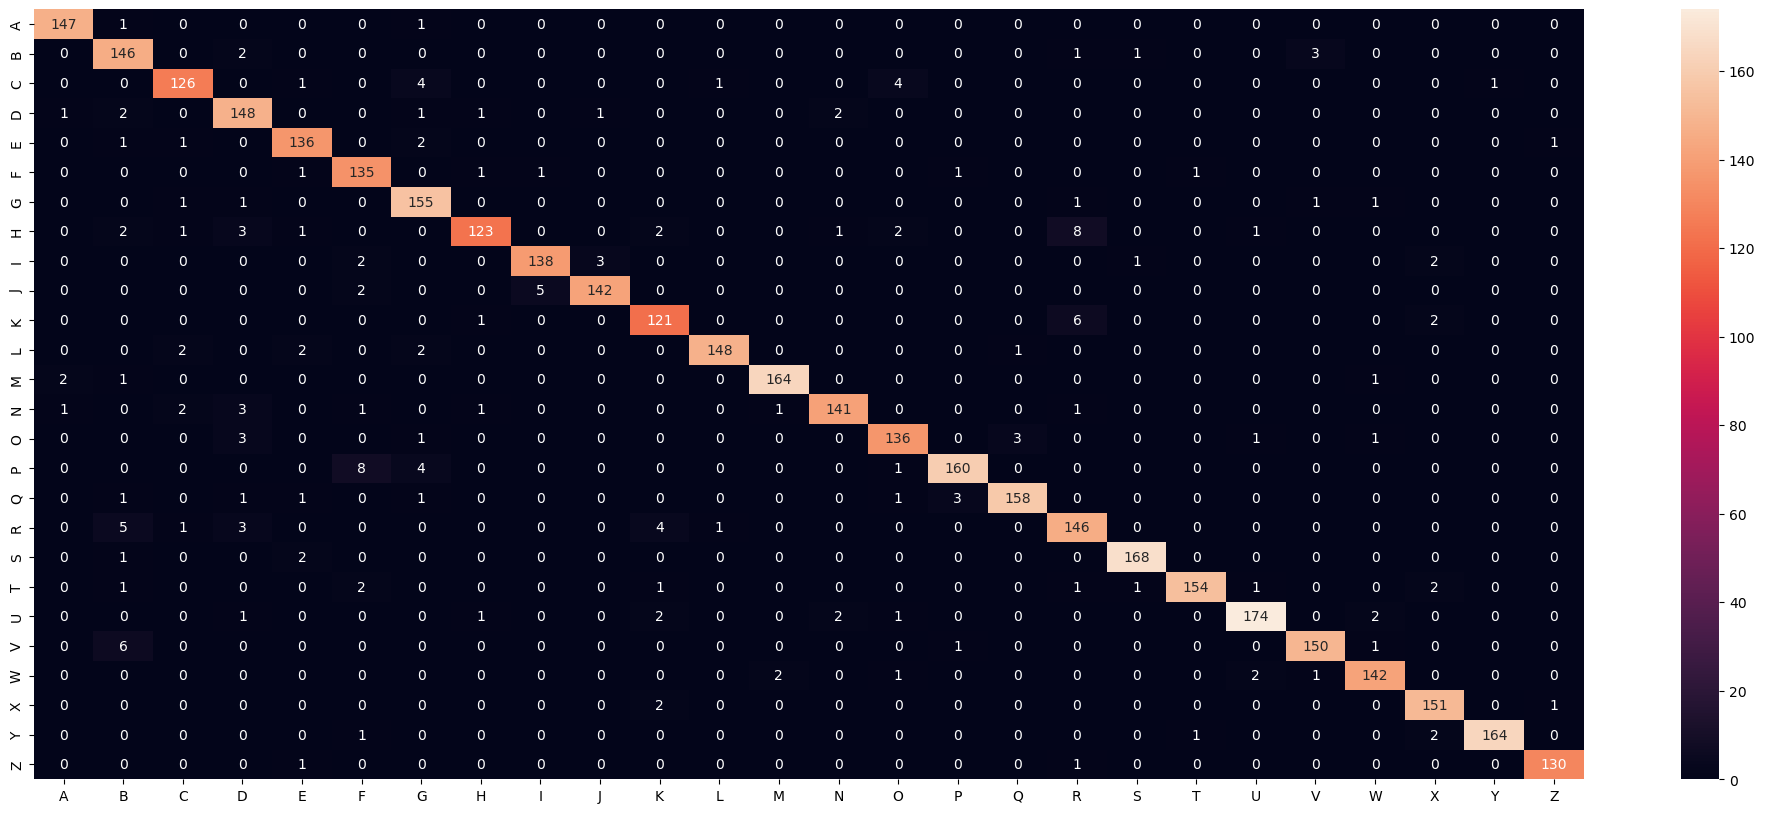

In [297]:
SVC_confusion_matrix = confusion_matrix(y_true=y_test,y_pred=y_pred_svc)
plt.figure(figsize=(25,10))
sns.heatmap(SVC_confusion_matrix,annot=True,fmt=".0f",yticklabels=labels,xticklabels=labels)